In [6]:
import pandas as pd
df = pd.read_csv("../cleaned_dataset/labelled_ble_data.csv")

In [7]:
df.head()

,timestamp,mac address,RSSI,room
0,2023-04-10 14:21:46+09:00,6,-93,kitchen
1,2023-04-10 14:21:46+09:00,6,-93,kitchen
2,2023-04-10 14:21:46+09:00,6,-93,kitchen
3,2023-04-10 14:21:46+09:00,6,-93,kitchen
4,2023-04-10 14:21:46+09:00,6,-93,kitchen


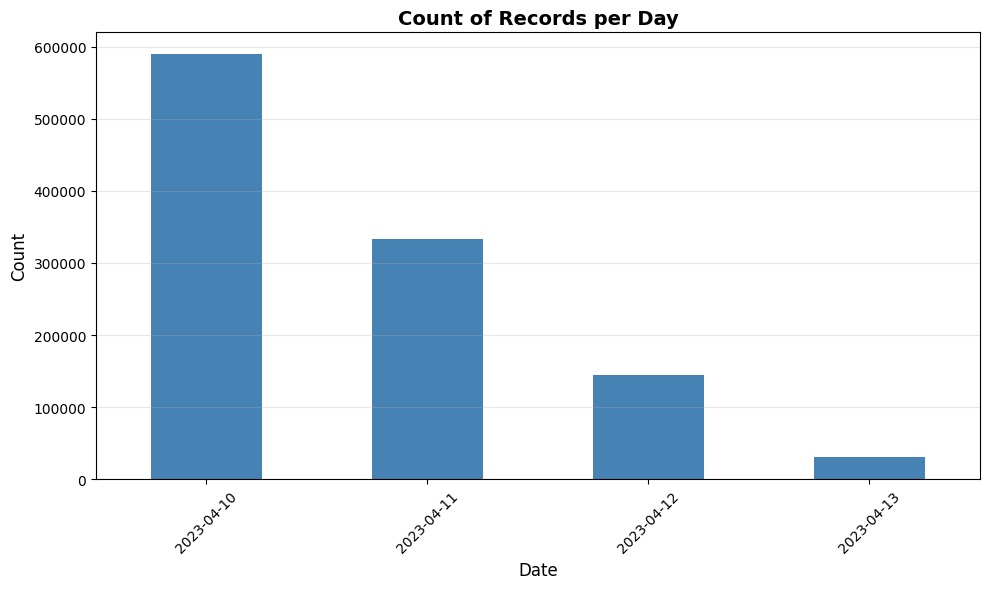

In [8]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime and extract date
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Count records per day
daily_counts = df['date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='steelblue')
plt.title('Count of Records per Day', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

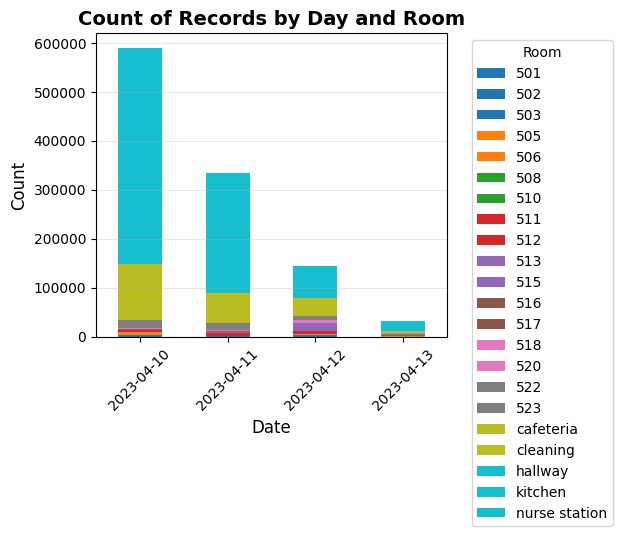

In [9]:
# Group by date and room, then count
room_daily_counts = df.groupby(['date', 'room']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
room_daily_counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Count of Records by Day and Room', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Room', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Note on choice of data splitting for train / test set
As the number of records on day 4 is so limited --> so i think we should use day 1 + 2 as train set and day 3 as test set --> this is for the model selection phase 

And for the validation of model choice (test once again to verify that the model actually good): train set = day 1 + 2 + 3 and test set = day 4

In [10]:
# Model Selection Split (Day 1+2 train / Day 3 val)

import os

# Extract date from timestamp
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Split by days
train_ms = df[df['date'].isin([pd.to_datetime('2023-04-10').date(), 
                                 pd.to_datetime('2023-04-11').date()])]
val_ms = df[df['date'] == pd.to_datetime('2023-04-12').date()]

# Drop the date column before saving
train_ms = train_ms.drop(columns=['date'])
val_ms = val_ms.drop(columns=['date'])

# Save to CSV
train_ms.to_csv('../cleaned_dataset/split_data/model_selection/train.csv', index=False)
val_ms.to_csv('../cleaned_dataset/split_data/model_selection/val.csv', index=False)

print(f"Model Selection Split:")
print(f"Train (Day 1+2): {len(train_ms)} records")
print(f"Val (Day 3): {len(val_ms)} records")
print(f"Files saved to: cleaned_dataset/split_data/model_selection/")

Model Selection Split:
Train (Day 1+2): 923954 records
Val (Day 3): 145030 records
Files saved to: cleaned_dataset/split_data/model_selection/
